# About Dataset

# Problem Statement:
The project is about world's largest taxi company Uber inc. In these project we're looking to predict the fare for their future transactional cases. And this company deliever services to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. So, it becomes really important to estimate the fare prices accurately.    

# Content:
1. key - a unique identifier for each trip

2. fare_amount - the cost of each trip in usd   = (Target Variable)

3. pickup_datetime - date and time when the meter was engaged

4. dropoff_latitude - the latitude where the meter was disengaged

5. pickup_longitude - the longitude where the meter was engaged

6. pickup_latitude - the latitude where the meter was engaged

7. dropoff_longitude - the longitude where the meter was disengaged

8. passenger_count - the number of passengers in the vehicle (driver entered value)

# Objective:
* Understand the Dataset & cleaning (if required).
* Build Regression models to predict the fare price of uber ride.
* Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

# Action Plan:
1. Data Exploration
2. Feature Engineering
3. Exploratory Data Analysis (EDA)
4. Data Pre-processing
5. Data Manipulation
6. Predictive Modelling
7. Project Outcomes & Conclusion    

# 1. Data Exploration

In [130]:
# Importing required libraries
import pandas as pd       # used for data analysis
import numpy as np        # used for mathematical calculations

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [131]:
# Importing dataset
fare = pd.read_csv(r"C:\Users\prati\Desktop\Python\Data Science\Machine Learning\Projects\uber.csv\uber.csv")
fare.head()            # top 5 rows

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [132]:
 fare.info()      # Data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


This dataset contains 200000 rows along with 9 features. Out of which 5 attributes are float type, 2 int and object respectively.

In [133]:
print(" Rows and Columns:", fare.shape)

print("\n Variables in the dataset: \n",fare.columns)

 Rows and Columns: (200000, 9)

 Variables in the dataset: 
 Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [134]:
# Checking number of unique rows in each attribute:
fare.nunique().sort_values()

passenger_count           8
fare_amount            1244
pickup_longitude      71066
dropoff_longitude     76894
pickup_latitude       83835
dropoff_latitude      90585
pickup_datetime      196629
Unnamed: 0           200000
key                  200000
dtype: int64

# 2. Feature Engineering

Removing Unnamed and key column from dataset, as it is irrelevant and not required for analysis.

In [135]:
fare.drop(['Unnamed: 0','key'],axis=1,inplace=True)

In [136]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


* Here, we can see that 'pickup_datetime' is object type.
* But according to definition , 'pickup_datetime' is date time stamp variable, which wrongly interpreted as 'object', so we need to convert this variable into datetime data type.

In [137]:
# Changing incorrect data type
fare.pickup_datetime=pd.to_datetime(fare.pickup_datetime)

In [138]:
fare.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [139]:
# Extractinf time features from datetime from further analysis:
fare['year'] = fare.pickup_datetime.dt.year
fare['month'] = fare.pickup_datetime.dt.month
fare['weekday'] = fare.pickup_datetime.dt.weekday
fare['day'] = fare.pickup_datetime.dt.day
fare['hour'] = fare.pickup_datetime.dt.hour

In [140]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
 7   year               200000 non-null  int64              
 8   month              200000 non-null  int64              
 9   weekday            200000 non-null  int64              
 10  day                200000 non-null  int64              
 11  hour               200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), flo

# Taxi fare mainly affected by various features such as:
1. Travelled distance
2. Time of travel
3. Demand and availability of Taxi
4. Some special places are more costly like Airport or other places where there might be toll

#### In case of Taxi fare distance between two points of journey is most important factor. So, we need to calculate the distance by using  'Heversine formula'  with the help of longitude and latitude values.

In [141]:
from math import *

### Heversine Formula
hav(θ) = sin**2(θ/2)

In [142]:
# function to calculate the travel distance from the longitudes and latitudes
def distance(longitude1, latitude1, longitude2, latitude2):
    travel_distance = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_distance.append(c)
       
    return travel_distance

In [143]:
fare['distance_in_km'] = distance(fare['pickup_longitude'].to_numpy(),
                                  fare['pickup_latitude'].to_numpy(),
                                  fare['dropoff_longitude'].to_numpy(),
                                  fare['dropoff_latitude'].to_numpy()
                                              )

In [144]:
fare.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour,distance_in_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,7,19,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,17,20,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,24,21,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,26,8,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,28,17,4.475450


* As we already retrieve information from pickup_datetime and got distance travelled.
* As pickup_datetime is not necessory for further analysis, we can drop this attribute.

In [145]:
fare.drop('pickup_datetime',axis=1, inplace = True)

In [146]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   year               200000 non-null  int64  
 7   month              200000 non-null  int64  
 8   weekday            200000 non-null  int64  
 9   day                200000 non-null  int64  
 10  hour               200000 non-null  int64  
 11  distance_in_km     199999 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 18.3 MB


Now, we have only required attributes in required data type. So we can perform further analysis.

# 3. Exploratory Data Analysis (EDA)

#### Peak hours during weekdays and weekends

<AxesSubplot:xlabel='hour', ylabel='count'>

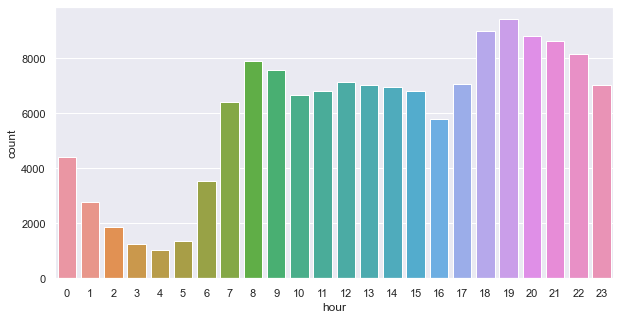

In [147]:
# Peak houes during weekdays
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=fare.loc[(fare.weekday >= 0) & (fare.weekday <=4)])

<AxesSubplot:xlabel='hour', ylabel='count'>

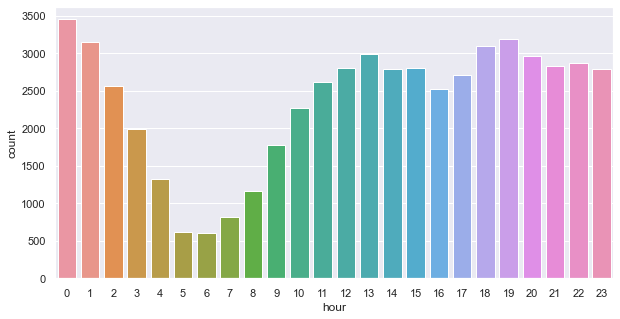

In [148]:
# Peak hours during weekend
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=fare.loc[(fare.weekday >= 5) & (fare.weekday <=6)])

* From above graph, we can say that pattern for demand of taxi is different for weekdays and weekends.
* In case of weekdays, demand of taxi is less during 3 am to 5 am.
* In case of weekends, demand of taxi is less during 5 am to 6 am.
* 7 pm is the busiest hour for uber drivers during weekdays whereas 12 am is the busiest hour during weekends.

# 4. Data Pre-processing

In [149]:
fare.describe()   # Summary report

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour,distance_in_km
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,199999.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,2011.742440,6.281795,3.048425,15.704670,13.491335,20.855350
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997,1.856397,3.438925,1.946946,8.687409,6.515531,382.964642
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,2009.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,2010.000000,3.000000,1.000000,8.000000,9.000000,1.215222
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2012.000000,6.000000,3.000000,16.000000,14.000000,2.120992
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,2013.000000,9.000000,5.000000,23.000000,19.000000,3.875169
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,2015.000000,12.000000,6.000000,31.000000,23.000000,16409.239135


* Here minimum value of fare is negative which is -52 which is not the valid value, so we need to remove the fare which are negative values.

* passenger_count minimum value is 0 and maximum value is 208 which is impossible, so we need to remove them as well, for safer side we can think that a taxi can have maximum 7 people.

In [150]:
# Checking for missing values present in data:
fare.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
year                 0
month                0
weekday              0
day                  0
hour                 0
distance_in_km       1
dtype: int64

As only 1 value missing in dropoff_longitude, dropoff_latitude and distance_in_km. We can drop them as it will not affect accuracy of data.

In [151]:
fare.dropna(axis = 0, inplace= True)

In [152]:
fare.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
weekday              0
day                  0
hour                 0
distance_in_km       0
dtype: int64

There are no missing values present in the data

In [153]:
fare.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour,distance_in_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,7,19,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,17,20,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,24,21,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,26,8,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,28,17,4.475450


<AxesSubplot:>

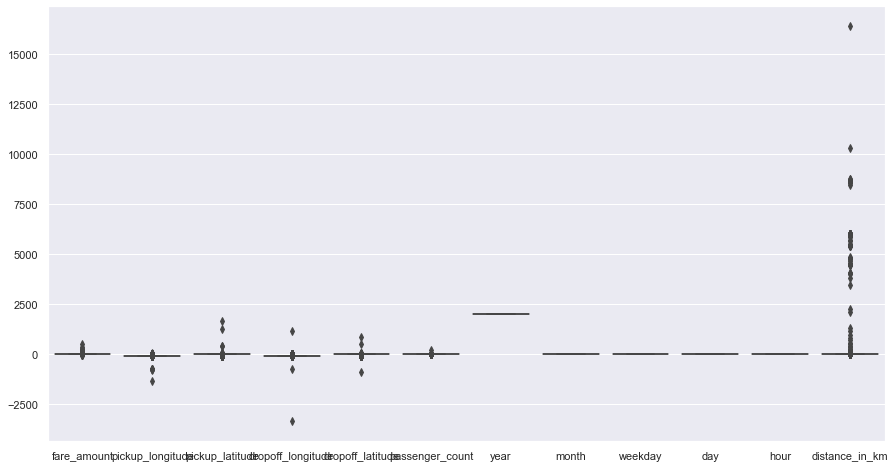

In [154]:
# Checking for outliers
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(data= fare)

There are outliers present in most of the important features, So need to treat them.

In [155]:
#We will only keep the observation where fare is between 2.5 dollars and removing negative observations
fare = fare.loc[(fare.fare_amount >= 0)]

In [156]:
fare.shape

(199982, 12)

In [157]:
def treat_outliers(fare):
    for i in fare.columns:    
        q1=fare[i].quantile(0.25)
        q3=fare[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        if ((fare[i].dtype=='float64') | (fare[i].dtype=='int64')):
            fare[i][fare[i]<= lower_limit] = lower_limit
            fare[i][fare[i]>= upper_limit] = upper_limit
        else:
            fare[i]=fare[i]
    return fare
        
treat_outliers(fare)    

C:\Users\prati\AppData\Local\Temp/ipykernel_2676/2732471902.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fare[i][fare[i]>= upper_limit] = upper_limit
C:\Users\prati\AppData\Local\Temp/ipykernel_2676/2732471902.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fare[i][fare[i]>= upper_limit] = upper_limit


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour,distance_in_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,3,7,19,1.683323
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,4,17,20,2.457590
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,0,24,21,5.036377
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,6,4,26,8,1.661683
4,16.00,-73.929788,40.744085,-73.973082,40.761247,3.5,2014,8,3,28,17,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,2012,10,6,28,10,0.112210
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,2014,3,4,14,1,1.875050
199997,22.25,-73.986017,40.756487,-73.922034,40.692588,2.0,2009,6,0,29,0,7.865287
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,2015,5,2,20,14,3.539715


<AxesSubplot:>

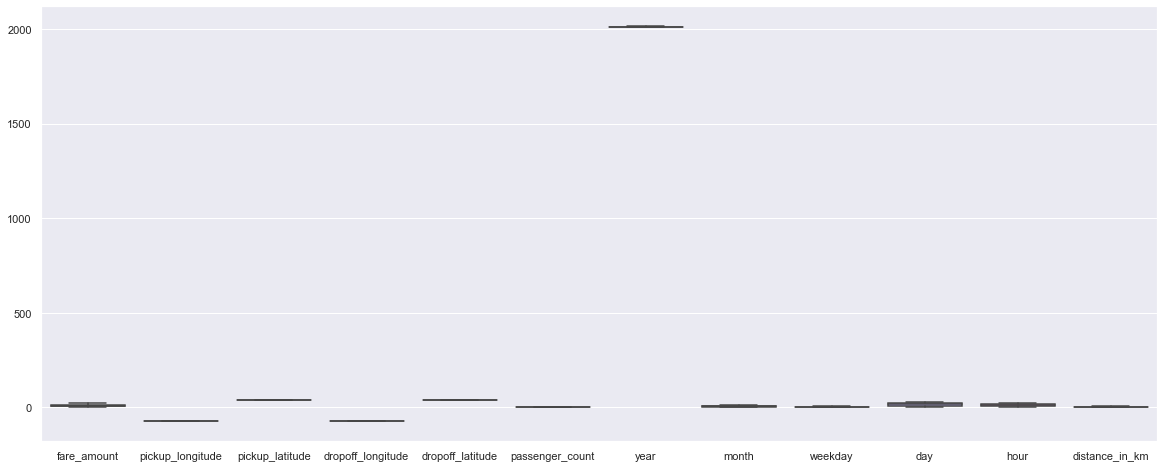

In [158]:
# Checking outliers in the data:
sns.set(rc={'figure.figsize':(20,8)})
sns.boxplot(data= fare)

There are no outliers present in the data

In [159]:
fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour,distance_in_km
count,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000
mean,10.082222,-73.978311,40.750196,-73.976192,40.750151,1.514341,2011.742357,6.282045,3.048474,15.705058,13.491329,2.854210
std,5.438969,0.020508,0.025659,0.022880,0.028660,0.876694,1.856317,3.438948,1.946970,8.687457,6.515457,2.223710
min,0.000000,-74.029431,40.686251,-74.033030,40.682558,0.000000,2009.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734795,-73.991407,40.733824,1.000000,2010.000000,3.000000,1.000000,8.000000,9.000000,1.215343
50%,8.500000,-73.981823,40.752592,-73.980092,40.753042,1.000000,2012.000000,6.000000,3.000000,16.000000,14.000000,2.121106
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,2013.000000,9.000000,5.000000,23.000000,19.000000,3.875321
max,22.250000,-73.929788,40.815702,-73.922034,40.819267,3.500000,2015.000000,12.000000,6.000000,31.000000,23.000000,7.865287


# 5. Data Manipulation

In [160]:
# Correlation Metrics
# It is used find the correlation between numerical variables
# corr() function gives correlation between variables
fare.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour,distance_in_km
fare_amount,1.000000,0.154117,-0.110904,0.218714,-0.125936,0.015901,0.141424,0.030638,0.013615,0.004461,-0.023589,0.844583
pickup_longitude,0.154117,1.000000,0.259515,0.425635,0.073295,-0.013231,0.010271,0.001185,-0.024631,-0.003190,0.011596,0.098033
pickup_latitude,-0.110904,0.259515,1.000000,0.048863,0.515750,-0.012871,-0.014232,0.001564,-0.042301,-0.001522,0.029693,-0.046815
dropoff_longitude,0.218714,0.425635,0.048863,1.000000,0.245682,-0.009313,0.011367,0.002389,-0.003306,-0.004022,-0.046590,0.186525
dropoff_latitude,-0.125936,0.073295,0.515750,0.245682,1.000000,-0.006294,-0.009546,-0.001194,-0.031924,-0.003474,0.019761,-0.038838
passenger_count,0.015901,-0.013231,-0.012871,-0.009313,-0.006294,1.000000,-0.009730,0.010401,0.048558,0.002686,0.020266,0.009684
year,0.141424,0.010271,-0.014232,0.011367,-0.009546,-0.009730,1.000000,-0.115863,0.006101,-0.012128,0.002140,0.024333
month,0.030638,0.001185,0.001564,0.002389,-0.001194,0.010401,-0.115863,1.000000,-0.008814,-0.017380,-0.003904,0.011614
weekday,0.013615,-0.024631,-0.042301,-0.003306,-0.031924,0.048558,0.006101,-0.008814,1.000000,0.005616,-0.086943,0.027089
day,0.004461,-0.003190,-0.001522,-0.004022,-0.003474,0.002686,-0.012128,-0.017380,0.005616,1.000000,0.004671,0.003034


<AxesSubplot:>

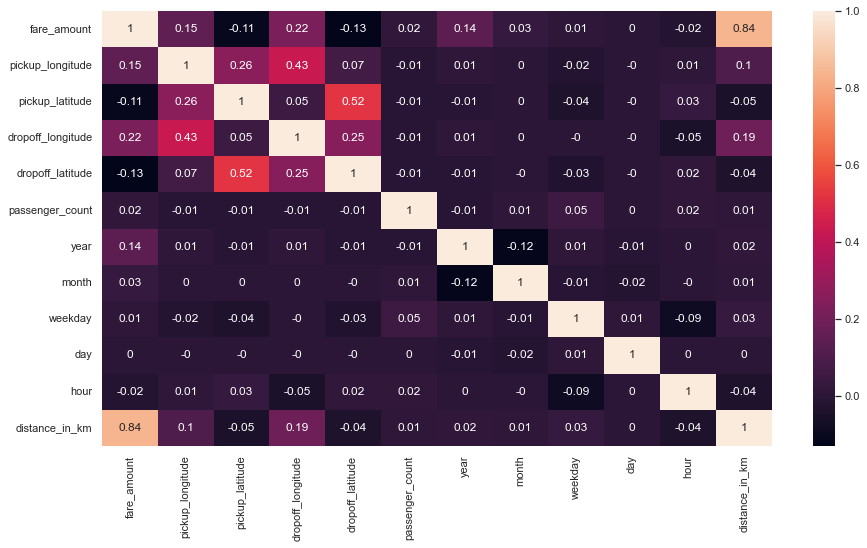

In [161]:
sns.set(rc={'figure.figsize': (15, 8)})
sns.heatmap(fare.corr().round(decimals=2,), annot=True,)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Relationship between Fare_amount and Distance'}, xlabel='distance_in_km', ylabel='fare_amount'>

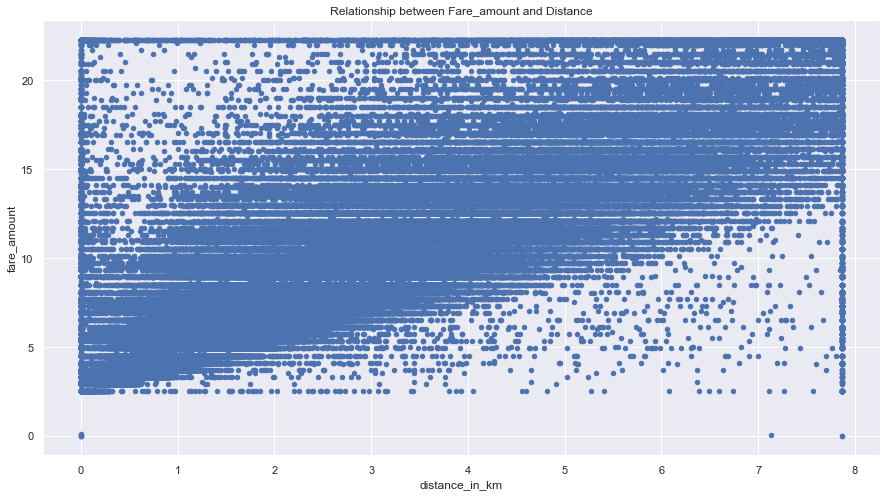

In [162]:
fare.plot.scatter(x='distance_in_km',y='fare_amount',title='Relationship between Fare_amount and Distance')

* There is 84% strong positive correlation of fare ammount with distance_in_km
* As distance_in_km is depends upon pickup_longitude, pickup_latitude, dropoff_longitude and dropoff_latitude, these variables may caused multi-collinearity.

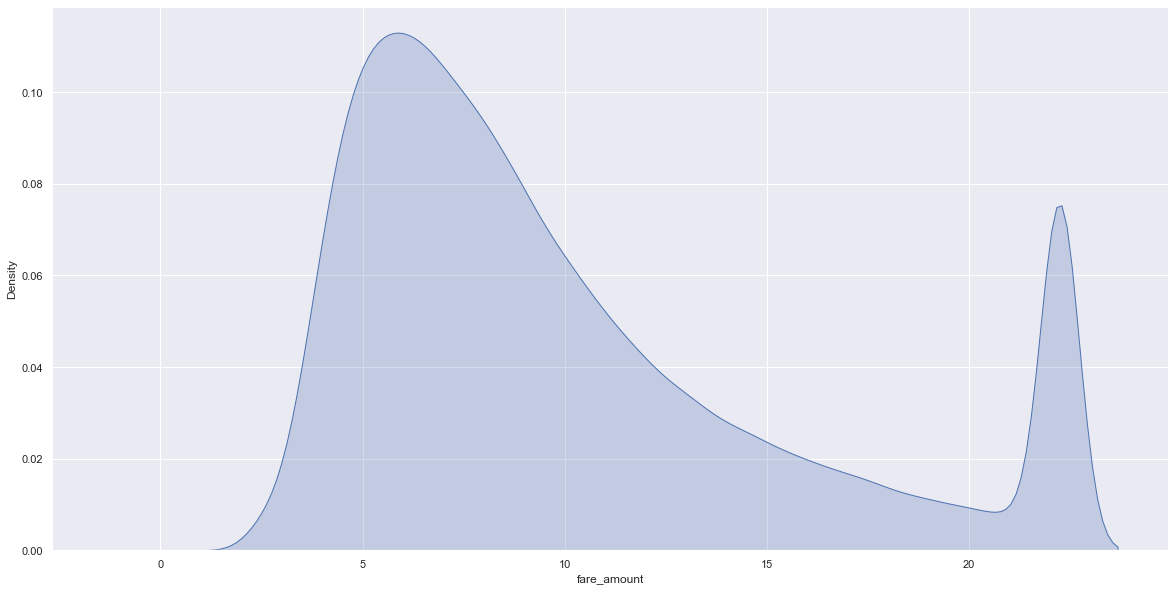

In [163]:
plt.figure(figsize = (20,10))
snsplot = sns.kdeplot(fare.fare_amount, shade=True)

Fare amount is ranging from 2 dollars to 25 dollars

# 6. Predictive Modeling

## Splitting The Data Into Trained And Test Data
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [ ]:
X = fare.drop('fare_amount',axis=1)
y = fare[['fare_amount']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=500)

In [ ]:
df = pd.concat([y_train,X_train],axis=1)
df

# Multicolinearity (with the help of VIF)

In [ ]:
X1=fare.drop(['fare_amount'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before               # VIF > 10 , then collinearity exists

No collinearity exists in the data.

# Model Building

Ho:- There is no linear relationship between fare_amount and independent variables.

Vs.

H1:- There is linear relationship between fare_amount and independent variables.

Alpha = 0.05

### A. OLS Method

In [ ]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
import statsmodels.api as sm
lrmodel_full = sm.OLS(y_train, X_train).fit()

# print the summary output
print(lrmodel_full.summary())

Accuracy of model is 94%, so we can say that model is good fit.

In [ ]:
lrmodel_full_predict = pd.DataFrame(lrmodel_full.predict(X_test))
lrmodel_full_predict

In [ ]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(y_test,lrmodel_full_predict )

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lrmodel_full_predict))
#print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lrmodel_full_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lrmodel_full_predict)))

RMSE for Linear Regression full model is 2.7 < 10, Model is good fit.

# B. Decision Tree

In [ ]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeRegressor()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)   # dt= model tree name

In [ ]:
dt_predict = pd.DataFrame(dt.predict(X_test))
dt_predict

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt_predict))
#print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt_predict)))

RMSE for Decision tree model is 3.41 , so we can say that model is good fit.

In [ ]:
dt.score(X_train,y_train)

In [ ]:
dt.score(X_test, y_test)

* Accuracy of train data is 99%, so we can say that model is overfit
* Accuracy of test data is 60%, So model is not good fit.

# C. Decision Tree After Pruning

In [ ]:
from sklearn import tree

dt = tree.DecisionTreeRegressor(criterion='mse',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=100, #parent 
                                 max_depth=6)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

In [ ]:
dtp_predict = pd.DataFrame(dt.predict(X_test))
dtp_predict

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dtp_predict))
#print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dtp_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dtp_predict)))

In [ ]:
dt.score(X_train,y_train)

In [ ]:
dt.score(X_test,y_test)

* Accuracy of train and test model of decision tree after pruning is 77%
* RMSE for test data is 2.5 < 10, so we can say that model is good fit.

# D. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestRegressor(max_depth=3)# n_estimators means number tree we want  

Model.fit(X_train, y_train)

In [ ]:
rf_predict = pd.DataFrame(Model.predict(X_test))
rf_predict

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_predict))
#print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))

RMSE for Random Forest model is 2.78 < 10, so we can say that model is good fit.

In [ ]:
Model.score(X_train, y_train)

In [ ]:
Model.score(X_test,y_test)

Accuracy for Random Forest model is 74% , so we can say that model is not good fit.

# Comparison of Models

In [ ]:
Comparison_of_Model = pd.DataFrame({'Model':['Linear Regression','Decision Tree', 'Decision Tree with Pruning' ,'Random_forest'],
                      'Accuracy of Model':[94,60,77,74],
                      'RMSE':[2.78,3.41,2.57,2.77]})

Comparison_of_Model

In [ ]:
Comparison_of_Model.plot(kind="bar",figsize=(15, 8))

plt.title("Accuracy_Of_Model")

plt.xlabel("Linear Regression ,Decision Tree , Decision Tree with Pruning , Random_forest ")

* From graph it is concluded that, Linear regression is best model for uber fare prediction. As it gives highest accuracy and RMSE.
* Decision tree after purning also gives less RMSE value but accuracy is less in that case, and it also leads to overfitting.
* After considering all drawbacks of other algorithm Linear regression is best suited algorithm for fare prediction.

# 7. Project Outcomes & Conclusion

* As dataset was large containing 200000 entries, EDA is performed on it and unnecessory samples removed from the dataset.
* From visualizaion it is seen that demand of taxi is less in early morning near about 4 am to 6 am.
* Multiple algortithms are applied on dataset to find out best one giving high accuracy and low RMSe.
* Linear regression is best suitable algorithm for uber fare prediction according to results.

# Completed